In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import re
from sklearn.model_selection import learning_curve
import time
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from yellowbrick.model_selection import LearningCurve

# Задания для выполнения

In [ ]:
news = fetch_20newsgroups(subset='all')
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [ ]:
len(news.data)

18846

In [ ]:
news.target.shape

(18846,)

In [ ]:
np.unique(news.target).shape

(20,)

In [ ]:
print(news.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [ ]:
categories = None
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 130107)

In [ ]:
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
mult = MultinomialNB(alpha=.01)
mult.fit(vectors, newsgroups_train.target)
pred = mult.predict(vectors_test)

                  0
Accuracy   0.803903
Precision  0.811819
Recall     0.803903


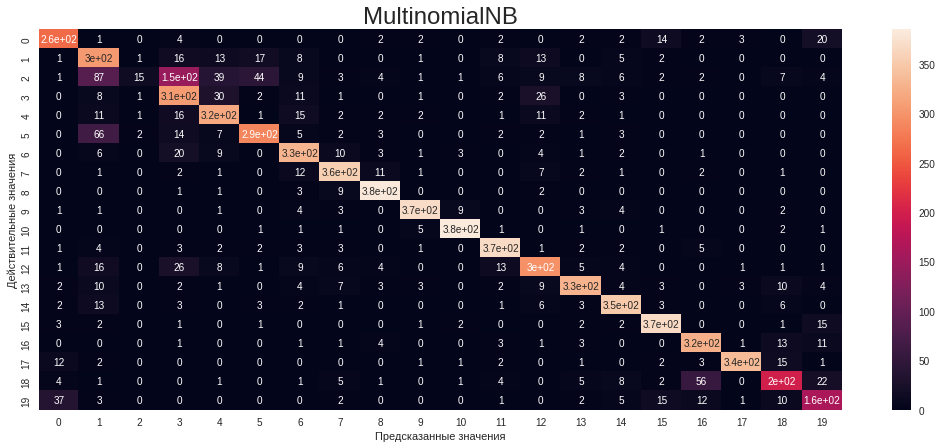

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(18,7))
ax.set_title('MultinomialNB', fontsize=24)
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(newsgroups_test.target, pred)), annot=True, ax=ax)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

print(pd.DataFrame(
    [
        metrics.accuracy_score(newsgroups_test.target, pred),
        metrics.precision_score(newsgroups_test.target, pred, average='weighted', zero_division=0),
        metrics.recall_score(newsgroups_test.target, pred, average='weighted', zero_division=0)
     ], 
    index=['Accuracy', 'Precision', 'Recall']))

In [ ]:
x_news = CountVectorizer().fit_transform(news.data)
def lerning_curve(model):
  warnings.simplefilter("ignore", category=ConvergenceWarning)
  model = LearningCurve(model)
  model.fit(x_news, news.target)
  model.show()

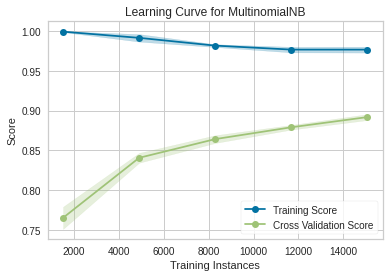

In [ ]:
lerning_curve(mult)

# Дополнительные задания

In [ ]:
xt, xtt, y_train, y_test = train_test_split(news.data, news.target, test_size=0.5, random_state=True)

In [ ]:
x_train = vectorizer.fit_transform(xt)

In [ ]:
x_test = vectorizer.transform(xtt)

In [ ]:
scores = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'time'])

In [ ]:
def create_model(model, average='weighted', x_train=x_train, x_test=x_test):
  start_time = time.time()
  model_name = re.sub(r'\([^)]*\)', '', str(model)) if str(model) != "SVC(kernel='linear')" else "SVC linear"
  
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  %matplotlib inline
  class_names = [0, 1]
  fig, ax = plt.subplots(figsize=(14,12))
  ax.set_title(model_name, fontsize=24)
  ticks = np.arange(len(class_names))
  plt.xticks(ticks, class_names)
  plt.yticks(ticks, class_names)
  sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, ax=ax)
  plt.ylabel('Действительные значения')
  plt.xlabel('Предсказанные значения')

  scores.loc[model_name] = [metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0), 
                            metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0), (time.time() - start_time)]

In [ ]:
gaussian = GaussianNB()
cls = LogisticRegression() 
svc = svm.SVC(kernel='linear')
svc_g = svm.SVC()
neigh = KNeighborsClassifier(weights='distance')
mlp = MLPClassifier()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


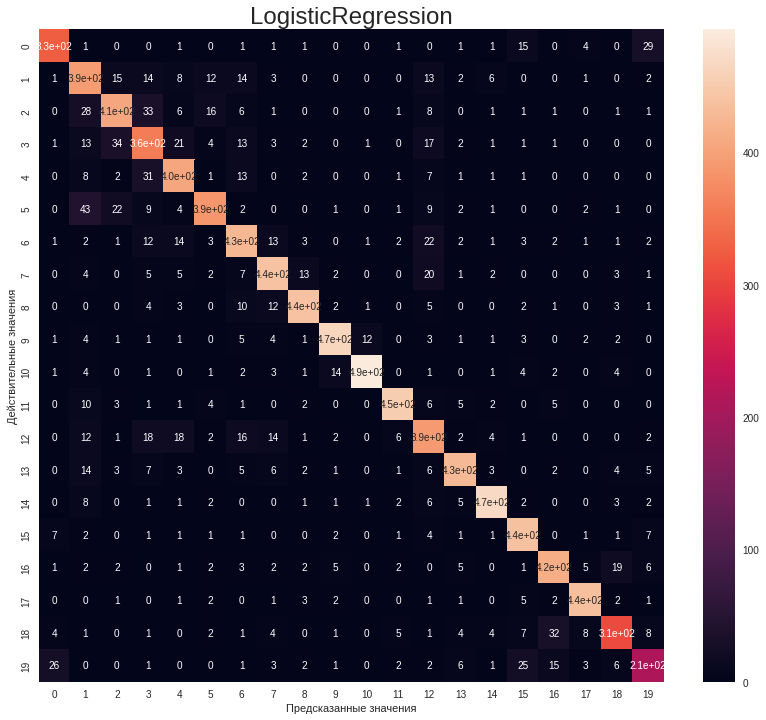

In [ ]:
create_model(cls)

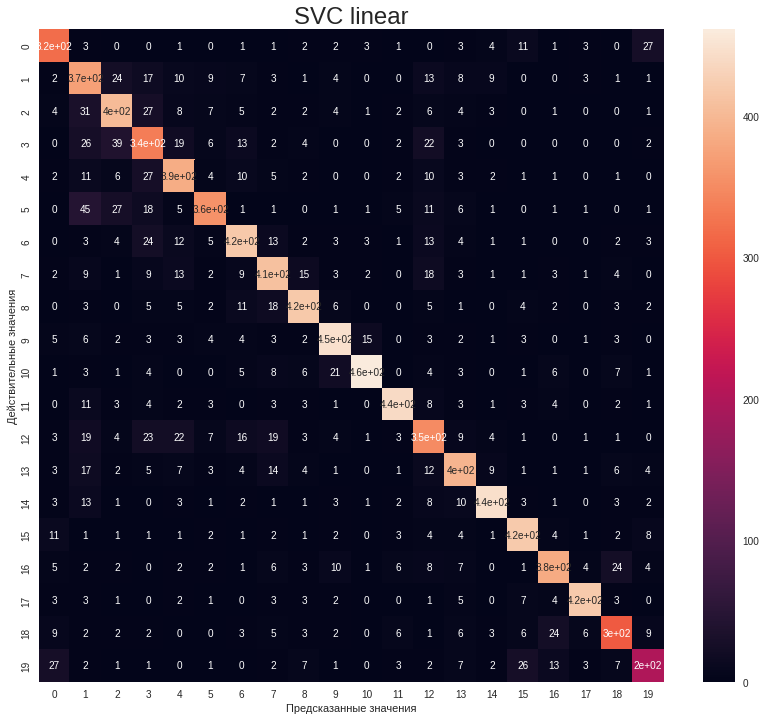

In [ ]:
create_model(svc)

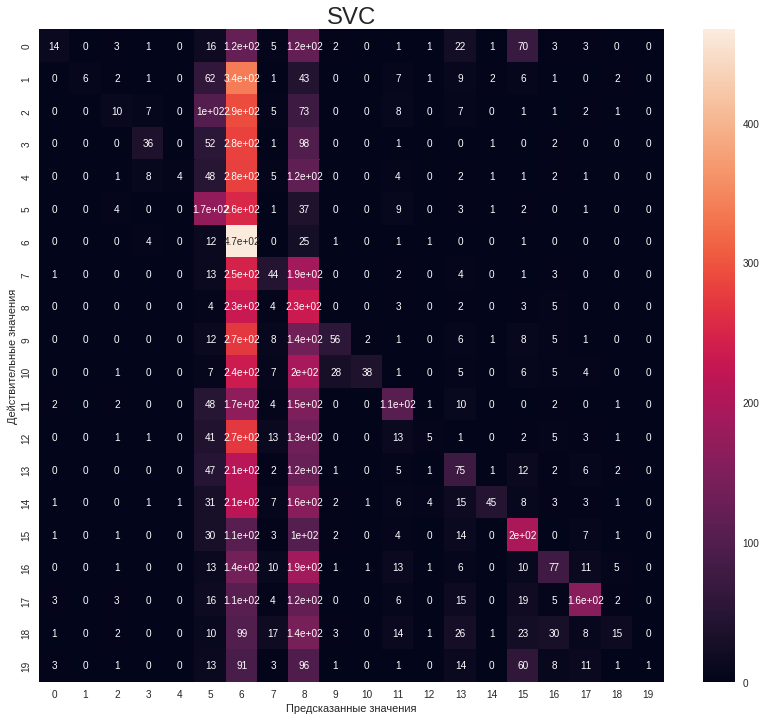

In [ ]:
create_model(svc_g)

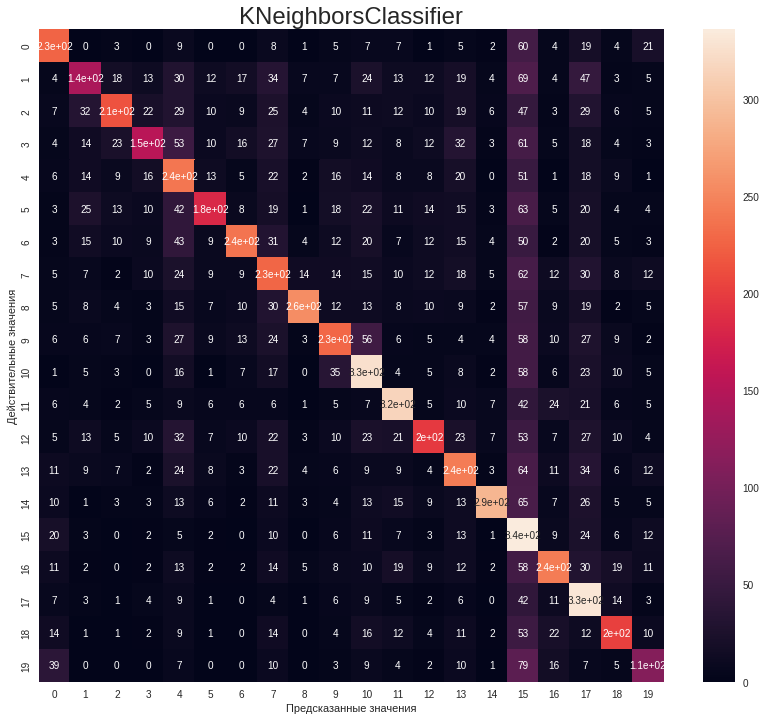

In [ ]:
create_model(neigh)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


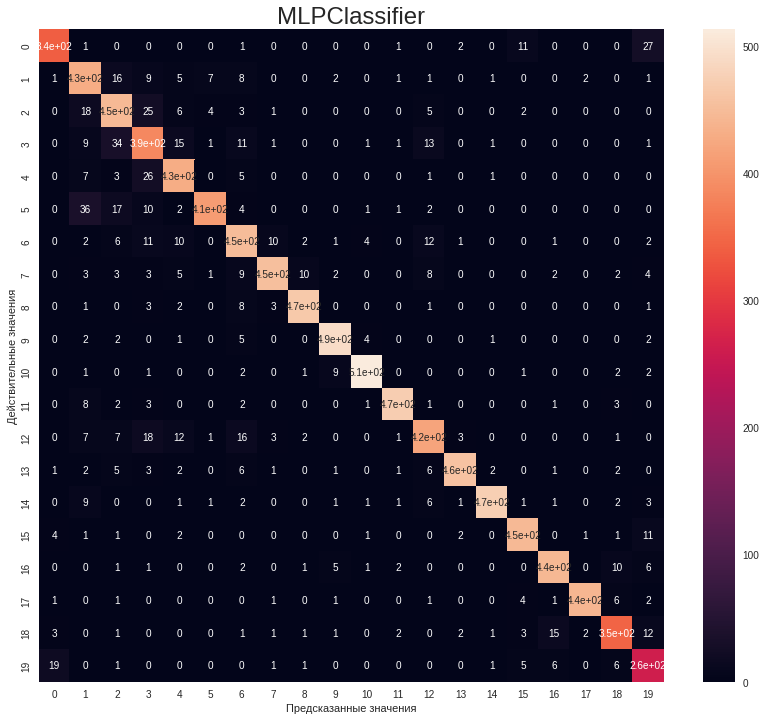

In [ ]:
create_model(mlp)

In [ ]:
create_model(gaussian, x_train=x_train.toarray(), x_test=x_test.toarray())

In [ ]:
scores

,accuracy,precision,recall,time
LogisticRegression,0.858856,0.861157,0.858856,72.814182
SVC linear,0.815770,0.819590,0.815770,179.485344
SVC,0.186777,0.520276,0.186777,382.964998
KNeighborsClassifier,0.499629,0.555037,0.499629,11.463015
MLPClassifier,0.910326,0.913328,0.910326,153.593699


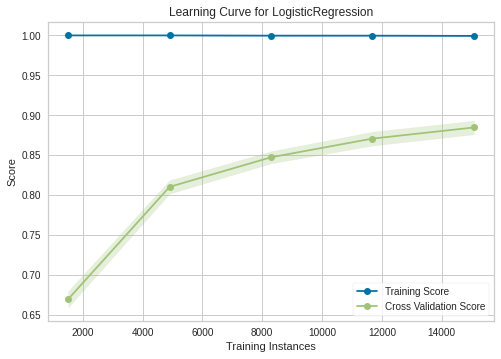

In [ ]:
lerning_curve(cls)

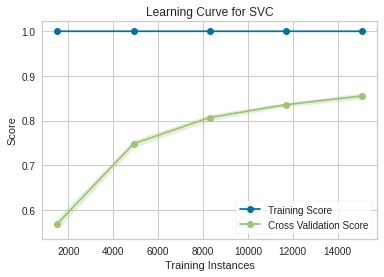

In [ ]:
lerning_curve(svc)

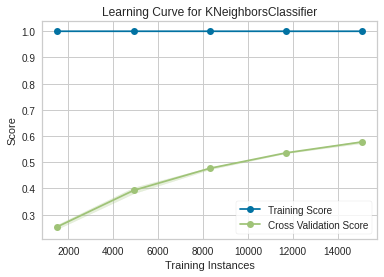

In [ ]:
lerning_curve(neigh)

In [ ]:
lerning_curve(mlp)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
lerning_curve(gaussian)

NameError: ignored

In [ ]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import cifar10

In [ ]:
y_testx = np_utils.to_categorical(y_test)
y_trainx = np_utils.to_categorical(y_train)
class_num = y_testx.shape[1]

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(4096, activation='relu', input_shape=x_train))
model.add(Dense(4096/2, activation='relu'))

model.add(Dense(class_num, activation='relu'))

epochs = 5
optimizer = 'sgd'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_trainx, validation_data=(x_test, y_testx), epochs=epochs, batch_size=64)

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 4096), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


148/148 [==============================] - 102s 684ms/step - loss: 7.3364 - accuracy: 0.0490 - val_loss: 7.4043 - val_accuracy: 0.0705
Epoch 2/5
148/148 [==============================] - 101s 685ms/step - loss: 7.2668 - accuracy: 0.0587 - val_loss: 7.4015 - val_accuracy: 0.0522
Epoch 3/5
148/148 [==============================] - 99s 668ms/step - loss: 7.2635 - accuracy: 0.0617 - val_loss: 7.3969 - val_accuracy: 0.0663
Epoch 4/5
148/148 [==============================] - 95s 640ms/step - loss: 7.2591 - accuracy: 0.0687 - val_loss: 7.3924 - val_accuracy: 0.0772
Epoch 5/5
148/148 [==============================] - 95s 644ms/step - loss: 6.7655 - accuracy: 0.0746 - val_loss: 5.4647 - val_accuracy: 0.0523


In [ ]:
scores = model.evaluate(x_test, y_testx)
print("Accuracy: %.2f%%" % (scores[1]*100))

295/295 [==============================] - 31s 105ms/step - loss: 5.4647 - accuracy: 0.0523
Accuracy: 5.23%
